## Graph Neural Networks 

### Process Data as Graphs 
- Process the information as nodes and edges/links. Based on the ordering of these nodes and graphs, we get different inputs. --> We can translate an ordeirng of graph into a tabular/picture input  

### Problems with processing graphs with traditional neural networks 
- Graphs are of different sizes (edges or nodes), and we can't change their size easily through padding/deletion like what we did with picture/tabular data. So traditional NN can't process graph data as easily   

- Graphs have the property of isomorphism. Two structurally same graphs (same number of nodes and edges but at different ordering) maybe processed by the neural network as different inputs when they are the same input (i.e. a rotated picture). So graph NN needs to be permutation invariant  
   
- Graph data are also not the same as tabular data that is based on a grid because graphs are non-euclidean. This makes hard to use traditional ML techniques such as convolution which only works on tabular data. 

### GNN and Message Passing 
- Uses embedding layers to embed nodes and edges --> embeded nodes and edges have information about other nodes/edges or the entire graph   
  
- With the embedded values/vectors, we can use the embedding to predict the nodes and edges of the entire graph   
  
- The hidden layers are known as Message Passing layers (passing information about other nodes/edges to other nodes). The specific implementation of these layers are done using Graph Convolution Network.   
  
- Similar with CNN convolutions, **graph convolution/message passing** determines a node neighborhood of certain size. Then we can take the embedded information of all those neighbors with the current node. Combine the information of neighbor nodes then add with the current node to get the new embedding information   
  
- Each convolution/message passing only looks at one neighborhood, after the first passing, each node **will have information about at least 1 other nodes** (assume we don't have an isolated node). And it's possible for two nodes to not have any information about each other. After repeating the message passing layers, the nodes will have more information about all other nodes.  (Starting from direct neighor to neighbor's neighbors)
  
- The embedding of the nodes are vectors containing information about other nodes and itself (think of embedding in transformers). The number of message passing we do is the number of hidden layers of a GNN   
  
- If we have too many message passing layers, the nodes may learn too much information about the neighbors, and the nodes become similar to each other (**over smoothing**), this leads to information loss    
  
- Message Passing: $$h_u^{k+1} = update(h_u + aggregrate(h_v   \forall v \in u_{neighbor}))$$  
- Variants of GNN varies in how the message passing updates the current node's information 

In [14]:
import torch 
import sys
import os
from torch_geometric.datasets import MoleculeNet 
import rdkit 
from rdkit import Chem 
from rdkit.Chem import Descriptors

ESOL dataset is consisted of molecules in their SMILES strings and graph representations (nodes and edges) and their solubility.  

**Note** that Pytorch Geometric uses RDKit at processing these datasets. So the node and attribute information are most likely extracted using RDKit in the background. 

In [2]:
data= MoleculeNet(root='.', name= "ESOL")
data 

ESOL(1128)

In [3]:
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])  
print("Sample  nodes: ", data[0].num_nodes) 
print("Sample  edges: ", data[0].num_edges)

# each sample of the data is a molecule containing its nodes with attributes (numerical values) predicting for one label 
# edge_index is alike the adjacency matrix that tells the connection between nodes. The first row is the node and the second row is the other node the corresponding node is connected to 
# edge_attr is 

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


/opt/anaconda3/envs/newEnv/lib/python3.12/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


32


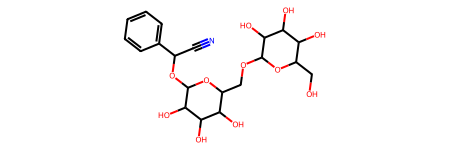

In [ ]:
# process the first data of the dataset 
mol = Chem.MolFromSmiles("OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O")   # rdkit 
print(mol.GetNumAtoms())    # 32 nodes, so each ndoe is an atom 
mol 

In [5]:
data[0].x   # returns the 32 nodes each with an embedding/attribute dimension of 9 

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [6]:
# edge connections 
data[0].edge_index.t()  # take the transpose to show the connection more clearly 

# edge_index is more efficient than a regular adjency matrix because of less space usage 

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [7]:
data[0].y   # the ground truth label for the corresponing graph. 

# In this context, the ground truth is the solubility of a given molecule (this is a grpah level prediction task)

tensor([[-0.7700]])

### Implementation of Graph Convolution Network    
- Similar implementation as a CNN   

In [8]:
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
import torch.nn as nn 

In [23]:
embedding_size= 64 
class GCN (nn.Module):
    def __init__(self): 
        super(GCN, self).__init__()  

        # GCN layers 
        self.initial_conv= GCNConv(data.num_features, embedding_size)   # embed the dimension of each node from initial information to embedding size 
        self.conv1= GCNConv(embedding_size, embedding_size) # same convolution size at the embedding 
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # output to a single prediction 
        self.out = nn.Linear(embedding_size*2, 1)   # output to  1 to match with the label size 
    # x is the input nodes 
    # edge_index corresponds to the nodes that are connected (we need edge_index to find the nearest edge to do the convolution) 
    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)   # 576 parameters at conv + 64 at bias
        hidden = F.tanh(hidden)     

         # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # mean pool and max pool after 3 times of message pooling
        # concatenate column wise 
        hidden= torch.cat([gmp(hidden, batch_index),gap(hidden,batch_index)], dim=1 ) # 64 + 64=128 
        # graph max pool and graph mean pool will take the entire embedding of all the nodes and do mean/max on them 
        # we then concatenate the max and pool embeddings as one embedding 
        # then we take all the information and use Linear() to output 1 prediction 
        # batch_index is passed in to help select which nodes' embedding vectors to be added 
        # Given a number of nodes with their embedding (size 64 in this case), max and mean compute the max and mean of those embeddings elementwise to get one final 64 dim embedding as max and 64 as mean

        out = self.out (hidden)
        return out, hidden 
    
model= GCN() 
print(model)
for p in model.parameters(): 
    print("Element parameters:", p.numel())


# 4096 parameters came from conv layers 
# 64 parameters are bias of the conv layer
# 128 parameters because out hidden is 128 dimensional (concatenated)
# 1 parameter is the bias of the linear 

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Element parameters: 64
Element parameters: 576
Element parameters: 64
Element parameters: 4096
Element parameters: 64
Element parameters: 4096
Element parameters: 64
Element parameters: 4096
Element parameters: 128
Element parameters: 1


In [ ]:
from torch_geometric.data import DataLoader 
loss_fn = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0007)

# load into data loader 
data_size= len(data)    # 1128 data points/molecules 
num_graphs_batch=64     # number of graphs=molecules in one training batch 
train_loader = DataLoader(data[:int(data_size*0.8)], batch_size=num_graphs_batch, shuffle=True)   # leave some as test data 
test_loader= DataLoader(data[int(data_size*0.8):], batch_size=num_graphs_batch, shuffle=True)    # test data 

def train(data):
    for batch in train_loader:  # dataloader breaks into batch, load each batch 
        optimizer.zero_grad() 
        pred, embedding= model(batch.x.float(), batch.edge_index ,batch.batch) # we'll pass in the embedding value, edge_index for convolution, and batch_index for max and mean pool 
        # shape: (batch,1)
        loss = loss_fn(pred, batch.y)
        loss.backward() 
        optimizer.step() 
    return loss, embedding  # return the embedding of the last batch 

losses = []
for epoch in range(2000):
    loss,h = train(data)
    losses.append(loss)
    if (epoch %100==0):
        print(f'Epoch:{epoch} | Loss: {loss}')
        


/opt/anaconda3/envs/newEnv/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch:0 | Loss: 5.5316948890686035
Epoch:100 | Loss: 1.3072565793991089
Epoch:200 | Loss: 0.9119471907615662
Epoch:300 | Loss: 0.33217883110046387
Epoch:400 | Loss: 0.3812631666660309
Epoch:500 | Loss: 0.7974088191986084
Epoch:600 | Loss: 0.8815068602561951
Epoch:700 | Loss: 0.4722096920013428
Epoch:800 | Loss: 0.5065104365348816
Epoch:900 | Loss: 0.1833658367395401
Epoch:1000 | Loss: 0.2375849485397339
Epoch:1100 | Loss: 0.22129060328006744
Epoch:1200 | Loss: 0.07339084148406982
Epoch:1300 | Loss: 0.08988898247480392
Epoch:1400 | Loss: 0.07881582528352737
Epoch:1500 | Loss: 0.020577041432261467
Epoch:1600 | Loss: 0.31766477227211
Epoch:1700 | Loss: 0.04936578869819641
Epoch:1800 | Loss: 0.04518899321556091
Epoch:1900 | Loss: 0.024692974984645844


#### Batch_Index 
- The batch Index is used to help track which nodes belong to which graph (because our data is consisted of different number of nodes and edges), then max and mean pool uses the batch_index to know which nodes belong to each graph because our batch has many graphs, so they can do max/mean on each specific graph   
  
- The ordering of numbers (0,0,0...) in batch indicates which graph these nodes belong to, for example 0 -> first graph, 1 -> second graph, etc. 


In [ ]:
b=next(iter(test_loader))
print(len(b))   # 64 training examples, so we have 0->63 in batch 
print(b.batch.shape)    # total of 846 nodes 
b.batch

64
torch.Size([866])


tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
        14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 17, 17, 17, 17, 17, 17, 17, 

<Axes: >

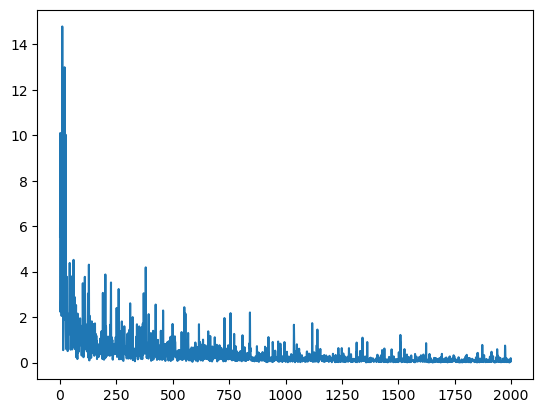

In [31]:
# plot the errors 
import seaborn as sns 
losses_float = [float(loss.cpu().detach()) for loss in losses]
loss_index = [i for i,_ in enumerate(losses_float)]
plt = sns.lineplot(x=loss_index, y=losses_float)
plt 


In [ ]:
import pandas as pd 
# show the prediction values of one test batch 
test_batch = next(iter(test_loader))
with torch.no_grad():
    pred, embed= model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df= pd.DataFrame() 
    df["y_real"]= test_batch.y.tolist()     # convert into a row vector collection  
    df["y_pred"] = pred.tolist() 
df["y_real"]= df["y_real"].apply(lambda row:row[0])
df["y_pred"]= df["y_pred"].apply(lambda row:row[0]) # make them into column vectors 
df

[[-3.630000114440918], [-4.631999969482422], [-3.7899999618530273], [-2.109999895095825], [-0.4000000059604645], [0.15000000596046448], [-1.0800000429153442], [-1.4900000095367432], [-1.7419999837875366], [-2.5179998874664307], [-3.5], [-4.71999979019165], [-2.3399999141693115], [-3.9000000953674316], [-1.8300000429153442], [-3.239000082015991], [-5.190000057220459], [-5.230000019073486], [-1.2999999523162842], [-6.090000152587891], [-0.8500000238418579], [-2.3489999771118164], [-4.659999847412109], [0.10000000149011612], [-3.180000066757202], [-4.590000152587891], [-1.600000023841858], [-0.800000011920929], [-2.3499999046325684], [-5.849999904632568], [-2.2809998989105225], [-8.5600004196167], [0.019999999552965164], [-3.880000114440918], [-2.119999885559082], [-0.009999999776482582], [-4.521999835968018], [-0.23999999463558197], [-4.570000171661377], [0.15000000596046448], [-3.5899999141693115], [-2.2100000381469727], [-2.5399999618530273], [-2.9820001125335693], [-0.7300000190734863

,y_real,y_pred
0,-3.630,-4.763083
1,-4.632,-4.695093
2,-3.790,-3.658044
3,-2.110,-1.666249
4,-0.400,-0.501847
...,...,...
59,1.144,0.568548
60,-3.091,-3.521595
61,-2.692,-3.095074
62,0.350,0.463480
